In [27]:
# 패키지 로딩하기
import pandas            as pd
import numpy             as np
import scipy.stats       as stats
import seaborn           as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽어오기 : Excel
payment = pd.read_excel(io         = "./payment.xlsx",
                        sheet_name = 0,
                        header     = 0)

payment

id group  income
0   1     A   10000
1   2     A   50000
2   3     A   30000
3   4     A   25000
4   5     B   28000
5   6     B   50000
6   7     B   37000

### 1. 독립 2표본 검정(Two sample test)

In [11]:
# 귀무가설 : 두 집단의 연봉에는 차이가 없다(muA == muB).
# 대립가설 : 두 집단의 연봉에는 차이가 있다(muA != muB).

In [3]:
# 1단계 : 정규성 검정(Normality Test)
# 귀무가설 : 정규분포를 따른다.
# 대립가설 : 정규분포를 따르지 않는다.

# n : 데이터의 개수 = 표본크기(sample size)
# n < 5000  : Shapiro-Wilk Normality Test
# n >= 5000 : Anderson-Darling Normality Test

# nA = 4 < 5000 : Shapiro-Wilk Normality Test
# nB = 3 < 5000 : Shapiro-Wilk Normality Test

In [6]:
print(stats.shapiro(payment.loc[payment.group == "A" , "income"]))
print(stats.shapiro(payment.loc[payment.group == "B" , "income"]))        

ShapiroResult(statistic=0.9797252425638964, pvalue=0.9004051114411608)
ShapiroResult(statistic=0.9891008174386918, pvalue=0.8002483284602546)


In [7]:
# A 집단
# statistic = 0.980 : 검정통계량(Test Statistic) : W
# p-value   = 0.900 : 유의확률
# p-value(0.900) > 유의수준(0.05) : 귀무가설 : 정규분포를 따른다.

# B 집단
# statistic = 0.989 : 검정통계량(Test Statistic) : W
# p-value   = 0.800 : 유의확률
# p-value(0.800) > 유의수준(0.05) : 귀무가설 : 정규분포를 따른다.

In [8]:
# 2단계 : 등분산 검정
# 귀무가설 : 등분산이다.
# 대립가설 : 이분산이다.

# scipy.stats.levene(data1, data2)

stats.levene(payment.loc[payment.group == "A", "income"],
             payment.loc[payment.group == "B", "income"])

LeveneResult(statistic=0.32273617158051604, pvalue=0.59452929634726)

In [9]:
# statistic = 0.323 : 검정통계량 : F
# p-value   = 0.595 : 유의확률
# p-value(0.595) > 유의수준(0.05) : 귀무가설 : 등분산이다.

In [12]:
# 3단계 : 등분산이 가정된 독립 2표본 t검정(Two sample t-test)
# scipy.stats.ttest_ind(data1, data2, equal_var = True, alternative = "two-sided")

stats.ttest_ind(payment.loc[payment.group == "A", "income"],
                payment.loc[payment.group == "B", "income"],
                equal_var   = True,
                alternative = "two-sided")

TtestResult(statistic=-0.8603823015597681, pvalue=0.42889519858937336, df=5.0)

In [13]:
# statistic = -0.860 : 검정통계량 : t
# p-value   = 0.429  : 유의확률
# df        = 5      : 자유도(degree of freedom) : nA + nB - 2 = 4 + 3 - 2 = 5

# p-value(0.429) > 유의수준(0.05) : 귀무가설 : 두 집단 간에 연봉에 차이가 없다.
# 유의확률이 0.429이므로 유의수준 0.05에서
# 두 집단 간의 연봉에 통계적으로 유의한 차이는 없는 것으로 나타났다.

In [14]:
# 귀무가설 : Ideal과 NonIdeal 간에 가격에 차이가 없다(muA == muB).
# 대립가설 : Ideal이 NonIdeal보다 가격이 높다(muA > muB)

In [15]:
diamonds = pd.read_excel(io = "./diamonds.xlsx",
                         sheet_name = 0,
                         header     = 0)
diamonds.head()

id  carat      cut color clarity  depth  table  price     x     y     z
0   1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [17]:
# 1단계 : 정규성 검정
# 귀무가설 : 정규분포를 따른다.
# 대립가설 : 정규분포를 따르지 않는다.

print(len(diamonds.loc[diamonds.cut == "Ideal", "price"]))
print(len(diamonds.loc[diamonds.cut != "Ideal", "price"]))

21551
32389


In [19]:
# nA = 21,551 > 5000 : Anderson-Darling Normality Test
# nB = 32,389 > 5000 : Anderson-Darling Normality Test

print(stats.anderson(diamonds.loc[diamonds.cut == "Ideal", "price"], dist = "norm"))
print()
print(stats.anderson(diamonds.loc[diamonds.cut != "Ideal", "price"], dist = "norm"))

AndersonResult(statistic=1865.0905557672377, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3457.541970210199, scale=3808.4011723490116)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

AndersonResult(statistic=1725.8414161971668, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4249.026830096638, scale=4074.939682658545)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [20]:
# Ideal
# statistic = 1865.091    : 검정통계량 : A
# critical_values = 0.787 : 임계값

# 검정통계량 > 임계값 : 대립가설, 검정통계량 <= 임계값 : 귀무가설
# 검정통계량(1,865.091) > 임계값(0.787) : 대립가설 : 정규분포를 따르지 않는다.

# NonIdeal
# statistic = 1725.841    : 검정통계량 : A
# critical_values = 0.787 : 임계값

# 검정통계량 > 임계값 : 대립가설, 검정통계량 <= 임계값 : 귀무가설
# 검정통계량(1,725.841) > 임계값(0.787) : 대립가설 : 정규분포를 따르지 않는다.

In [22]:
# 2단계 : 윌콕슨의 순위합 검정(Wilcoxon's rank sum test)
# scipy.stats.ranksums(data1, data2, alternative = )
stats.ranksums(diamonds.loc[diamonds.cut == "Ideal", "price"], 
               diamonds.loc[diamonds.cut != "Ideal", "price"],
               alternative = "greater")

RanksumsResult(statistic=-27.277266218787283, pvalue=1.0)

In [23]:
# statistic = -27.277 : 검정통계량 : Z
# p-value   = 1.000   : 유의확률
# p-value(1.000) > 유의수준(0.05) : 귀무가설 : Ideal와 NonIdeal 간에 price에 차이가 없다.
# 유의확률이 1.000 이므로 유의수준 0.05에서
# Ideal과 NonIdeal 간에 price에는 통계적으로 유의한 차이는 없는 것으로 나타났다.

In [26]:
# 기술통계량
diamonds["cut2"] = diamonds["cut"].apply(lambda x : "Ideal" if x == "Ideal" else "NonIdeal")
diamonds.groupby("cut2").price.describe()

count        mean          std    min     25%     50%     75%  \
cut2                                                                        
Ideal     21551.0  3457.54197  3808.401172  326.0   878.0  1810.0  4678.5   
NonIdeal  32389.0  4249.02683  4074.939683  326.0  1050.0  2923.0  5708.0   

              max  
cut2               
Ideal     18806.0  
NonIdeal  18823.0

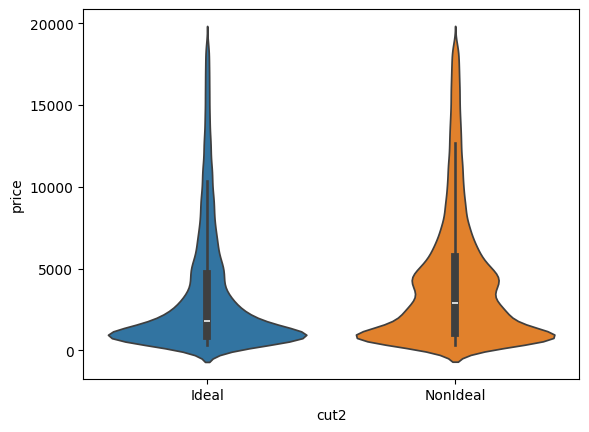

In [29]:
sns.violinplot(data = diamonds,
               y    = "price",
               x    = "cut2",
               hue  = "cut2")
plt.show()

### 2. 대응 2표본 검정(Paired test)

In [30]:
# 귀무가설 : 이부일 강사의 강의는 효과가 없다(muA == muB).
# 대립가설 : 이부일 강사의 강의는 효과가 있다(muA < muB).

In [31]:
satisfy = pd.read_excel(io         = "./satisfy.xlsx",
                        sheet_name = 0,
                        header     = 0)
satisfy

id  pre  post
0   1    3     5
1   2    3     5
2   3    4     5
3   4    3     4
4   5    4     5
5   6    2     5

In [32]:
satisfy["difference"] = satisfy["pre"] - satisfy["post"]
satisfy

id  pre  post  difference
0   1    3     5          -2
1   2    3     5          -2
2   3    4     5          -1
3   4    3     4          -1
4   5    4     5          -1
5   6    2     5          -3

In [33]:
# 1단계 : 정규성 검정
# 귀무가설 : (difference) 정규분포를 따른다.
# 대립가설 : (difference) 정규분포를 따르지 않는다.

# n = 6 < 5000 : Shapiro-Wilk Normality Test

stats.shapiro(satisfy.difference)

ShapiroResult(statistic=0.8216155622835087, pvalue=0.09113502185141942)

In [34]:
# statistic = 0.822 : 검정통계량 : W
# p-value   = 0.091 : 유의학률
# p-value(0.091) > 유의수준(0.05) : 귀무가설 : 정규분포를 따른다.

In [35]:
# 2단계 : 대응 2표본 t검정(Paired t-test)
# scipy.stats.ttest_rel(data.pre, data.post, alternative = )

stats.ttest_rel(satisfy.pre,
                satisfy.post,
                alternative = "less")

TtestResult(statistic=-5.000000000000001, pvalue=0.0020523579900266595, df=5)

In [36]:
# statistic = -5.000 : 검정통계량 : t
# p-value   = 0.002  : 유의학률
# df        = 5      : 자유도(degree of freedom) : n - 1 = 6 - 1 = 5

# p-value(0.002) < 유의수준(0.05) : 대립가설 : 이부일 강사의 강의는 효과가 있다.
# 유의확률이 0.002이므로 유의수준 0.05에서
# 이부일 강사의 데이터 분석을 위한 확률과 통계 강의는 통계적으로 매우 유의한 효과가 있는 것으로 나타났다.

In [37]:
# 만약에 1단계의 결론 : 정규분포를 따르지 않는다고 나왔다면
# 2단계 : 윌콕슨의 부호 순위 검정(Wilcoxon's signed rank test)
# scipy.stats.wilcoxon(data.pre, data.post, alternative = "less")